# Graphs of soundings of DBpedia Endpoint access

In [2]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import csv
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter
from operator import itemgetter
import pandas as pd

We will carry out queries on DBpedia in order to find out the completeness of the data concerning economists and lawyers (and also the classes and properties related to them).

Here, we will present the results in the form of a bar chart.

In [3]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql")

## Queries about lawyers
### Lawyer as an instance (https://dbpedia.org/resource/Lawyer):


In [4]:
query_lawyers_1= """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("Lawyer" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbr:Lawyer
                      ?propriety ?object
          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbr:Lawyer
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [5]:
sparql.setQuery(query_lawyers_1)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [6]:
# Number of rows in the result
len(rc['results']['bindings'])

56

In [7]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/wikiPageWikiLink'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '11695'}, 'category': {'type': 'literal', 'value': 'Lawyer'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/profession'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '2510'}, 'category': {'type': 'literal', 'value': 'Lawyer'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/occupation'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '2503'}, 'category': {'type': 'literal', 'value': 'Lawyer'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/property/profession'}, 'direction': {'type': 'literal', 'valu

In [8]:
# Explore
ProprietyList = []
for l in rc['results']['bindings']:
    ProprietyList.append(l['freq']['value'])

In [9]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [178]:
df1 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df1.set_index('propriety')
df1['freq']=df1['freq'].astype(float)

In [179]:
# Data frame without the first row (PageWikiLink)
# because we notice that the PageWikiLink headcount overwhelmes the other proprieties headcounts
dfwtwl1=(df1[1:])

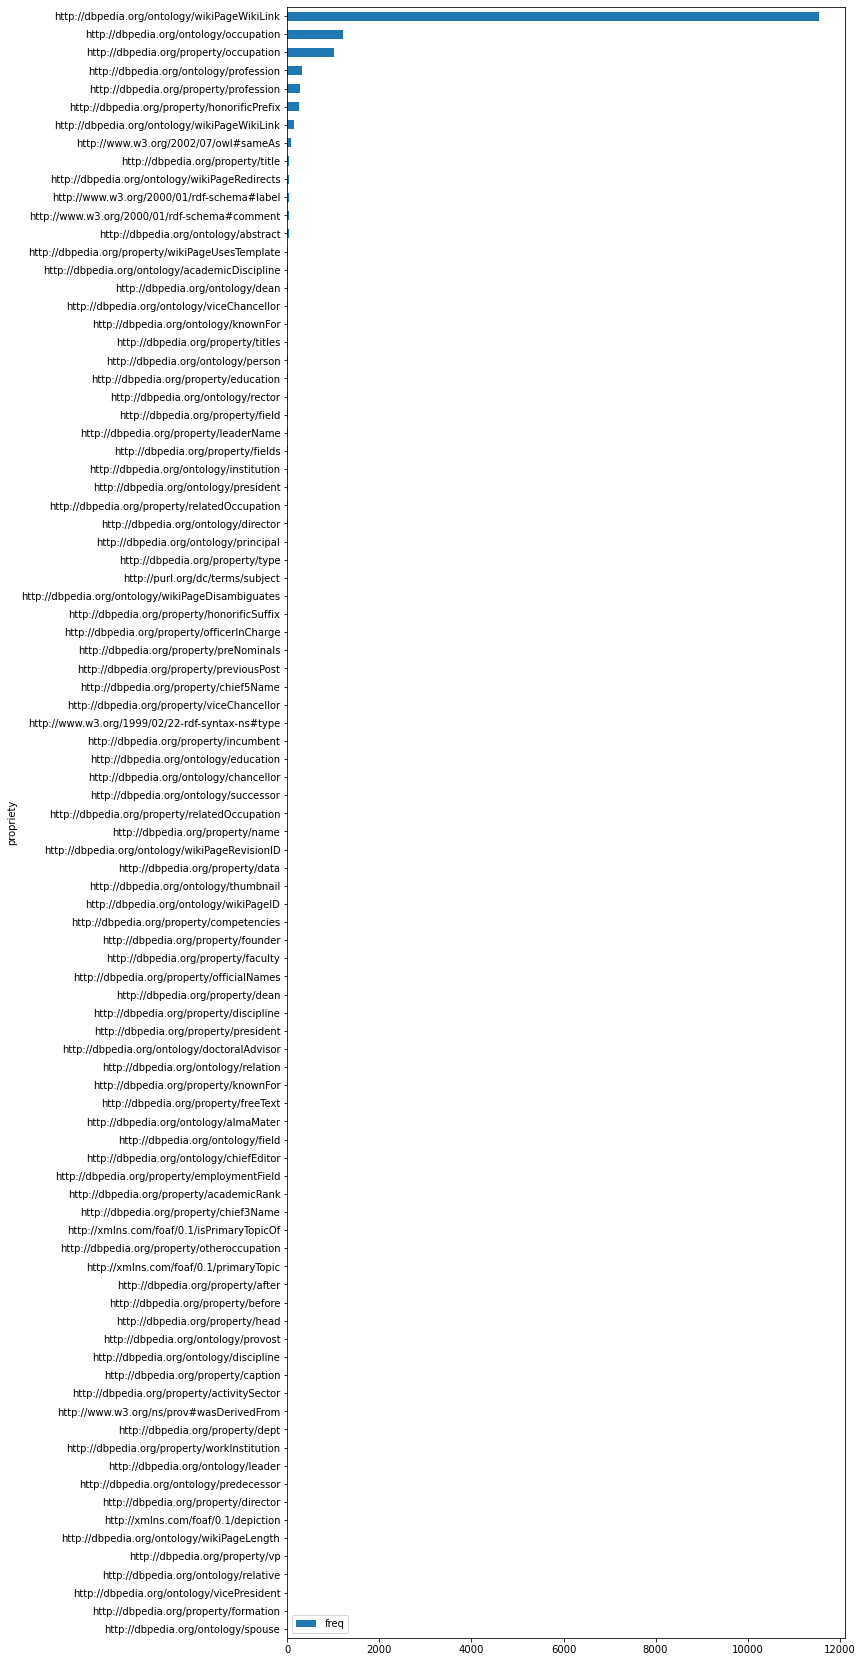

In [180]:
df1.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gcf().set_size_inches(10, 30)
plt.gca().invert_yaxis()
plt.show()

# plt.savefig("Jurist_survey.png") # save as png

### Lawyer as a class (https://dbpedia.org/ontology/Lawyer):

In [25]:
query_lawyers_2= """

PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("Lawyer" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbo:Lawyer
                      ?propriety ?object
          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbo:Lawyer
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [26]:
sparql.setQuery(query_lawyers_2)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [27]:
# Number of rows in the result
len(rc['results']['bindings'])

10

In [28]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#label'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '12'}, 'category': {'type': 'literal', 'value': 'Lawyer'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#comment'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '2'}, 'category': {'type': 'literal', 'value': 'Lawyer'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2002/07/owl#equivalentClass'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '2'}, 'category': {'type': 'literal', 'value': 'Lawyer'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'}, 'direction': {'type': 'l

In [29]:
# Explore
ProprietyList = []
for l in rc['results']['bindings']:
    ProprietyList.append(l['freq']['value'])

In [30]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [31]:
df2 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df2.set_index('propriety')
df2['freq']=df2['freq'].astype(float)

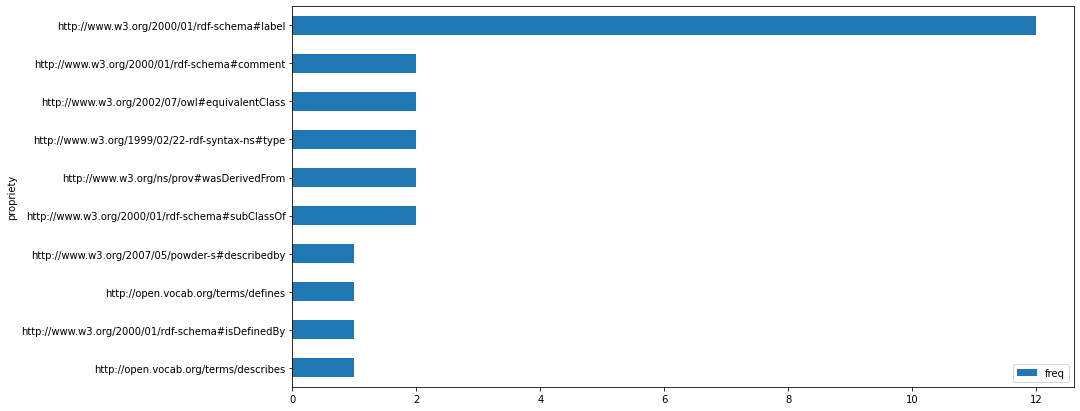

In [33]:
df2.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.show()

# plt.savefig("Jurist_survey.png") # save as png

### Jurist as an instance (https://dbpedia.org/resource/Jurist):

In [34]:
query_lawyers_3= """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("Lawyer" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbr:Jurist
                      ?propriety ?object
          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbr:Jurist
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [35]:
sparql.setQuery(query_lawyers_3)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [36]:
# Number of rows in the result
len(rc['results']['bindings'])

34

In [31]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/wikiPageWikiLink'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '2628'}, 'category': {'type': 'literal', 'value': 'Lawyer'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/profession'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '215'}, 'category': {'type': 'literal', 'value': 'Lawyer'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/property/occupation'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '212'}, 'category': {'type': 'literal', 'value': 'Lawyer'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/occupation'}, 'direction': {'type': 'literal', 'value':

In [32]:
# Explore
ProprietyList = []
for l in rc['results']['bindings']:
    ProprietyList.append(l['freq']['value'])

In [33]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [175]:
df3 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df3.set_index('propriety')
df3['freq']=df3['freq'].astype(float)

In [176]:
# Data frame without the first row (PageWikiLink)
# because we notice that the PageWikiLink headcount overwhelmes the other proprieties headcounts
dfwtwl3=(df3[1:])

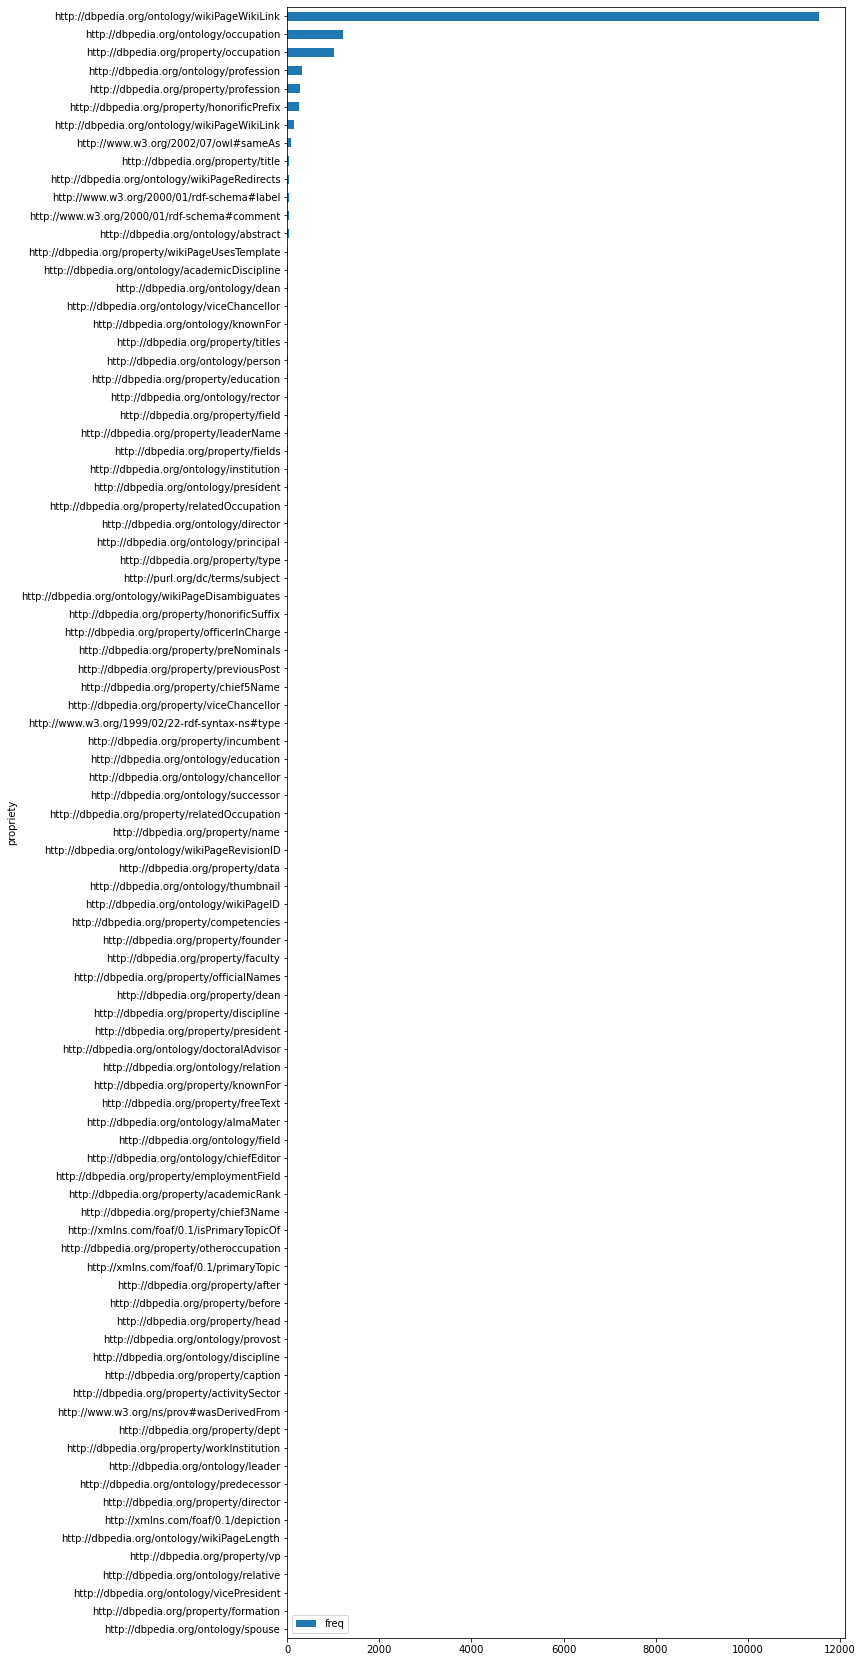

In [177]:
df3.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gcf().set_size_inches(10, 30)
plt.gca().invert_yaxis()
plt.show()

# plt.savefig("Jurist_survey.png") # save as png

### Étienne_Laspeyres as an instance (https://dbpedia.org/resource/Étienne_Laspeyres):

In [148]:
query_lawyers_4= """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("Lawyer" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbr:Étienne_Laspeyres #it's an exemple of lawyer
                      ?propriety ?object
          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbr:Étienne_Laspeyres
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [38]:
sparql.setQuery(query_lawyers_4)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [39]:
# Number of rows in the result
len(rc['results']['bindings'])

35

In [40]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/wikiPageWikiLink'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '35'}, 'category': {'type': 'literal', 'value': 'Lawyer'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '33'}, 'category': {'type': 'literal', 'value': 'Lawyer'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2002/07/owl#sameAs'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '19'}, 'category': {'type': 'literal', 'value': 'Lawyer'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/wikiPageWikiLink'}, 'direction': {'type': 'litera

In [41]:
# Explore
ProprietyList = []
for l in rc['results']['bindings']:
    ProprietyList.append(l['freq']['value'])

In [42]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [172]:
df4 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df4.set_index('propriety')
df4['freq']=df4['freq'].astype(float)

In [173]:
# Data frame without the first row (PageWikiLink)
# because we notice that the PageWikiLink headcount overwhelmes the other proprieties headcounts
dfwtwl4=(df4[1:])

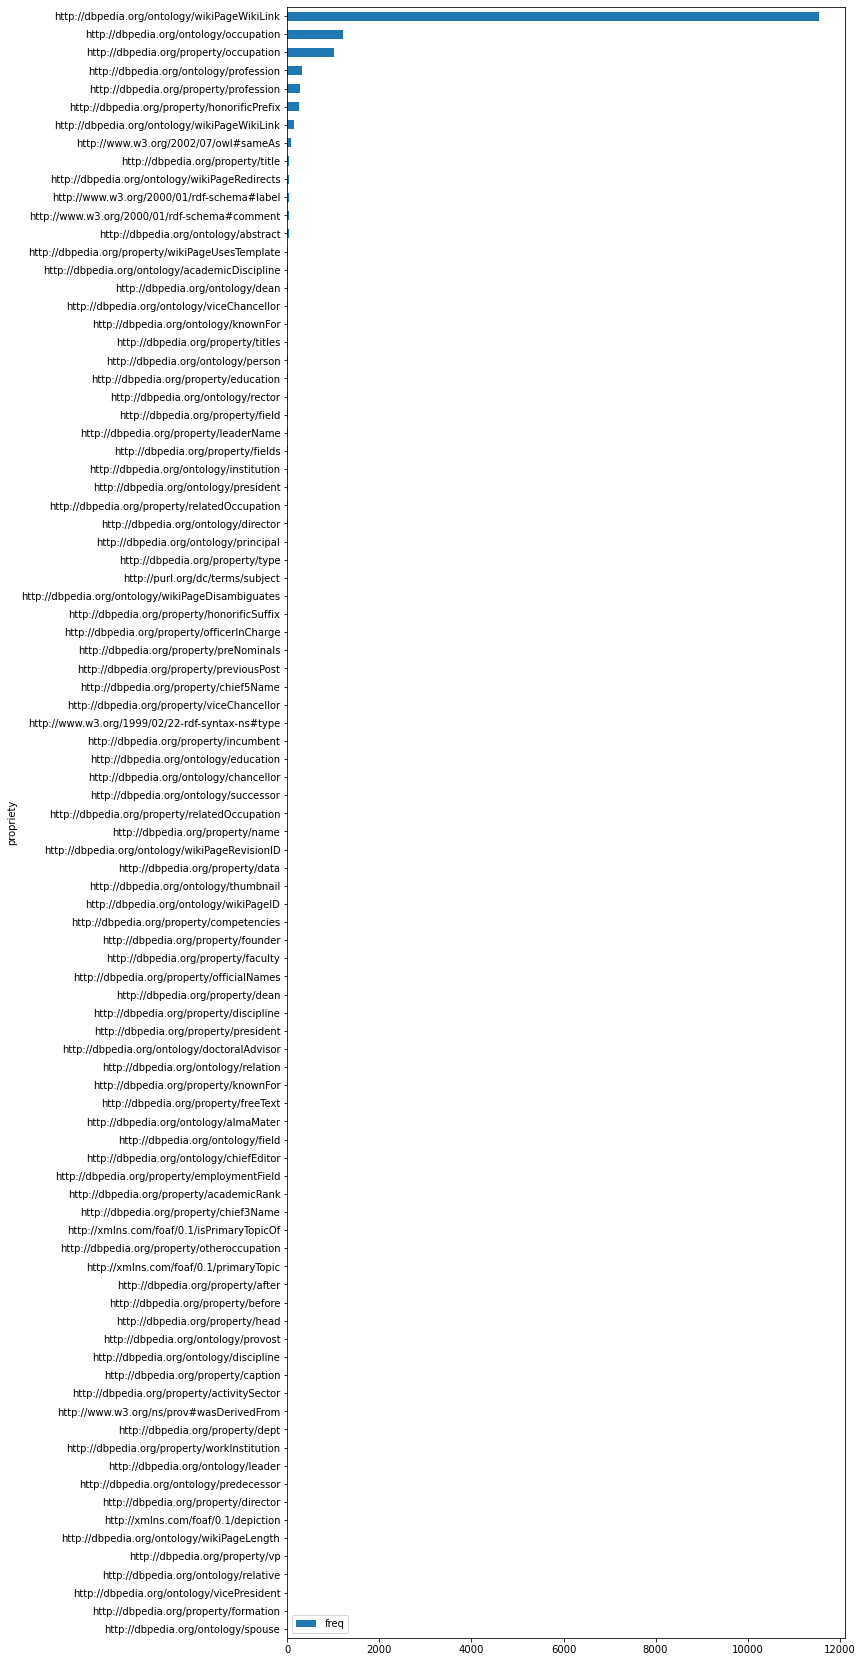

In [174]:
df4.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gcf().set_size_inches(10, 30)
plt.gca().invert_yaxis()
plt.show()

# plt.savefig("Jurist_survey.png") # save as png

## Queries about economists
### Economist as a class (https://dbpedia.org/ontology/Economist):

In [37]:
query_economists_1= """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("economist" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbo:Economist
                      ?propriety ?object
          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbo:Economist
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [38]:
sparql.setQuery(query_economists_1)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [39]:
# Number of rows in the result
len(rc['results']['bindings'])

11

In [40]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1570'}, 'category': {'type': 'literal', 'value': 'economist'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#label'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '18'}, 'category': {'type': 'literal', 'value': 'economist'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#comment'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '6'}, 'category': {'type': 'literal', 'value': 'economist'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2002/07/owl#equivalentClass'}, 'direction': 

In [41]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']] )
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [42]:
result

[['http://www.w3.org/1999/02/22-rdf-syntax-ns#type', '1570', 'economist'],
 ['http://www.w3.org/2000/01/rdf-schema#label', '18', 'economist'],
 ['http://www.w3.org/2000/01/rdf-schema#comment', '6', 'economist'],
 ['http://www.w3.org/2002/07/owl#equivalentClass', '2', 'economist'],
 ['http://www.w3.org/1999/02/22-rdf-syntax-ns#type', '2', 'economist'],
 ['http://www.w3.org/ns/prov#wasDerivedFrom', '2', 'economist'],
 ['http://www.w3.org/2000/01/rdf-schema#subClassOf', '2', 'economist'],
 ['http://www.w3.org/2007/05/powder-s#describedby', '1', 'economist'],
 ['http://open.vocab.org/terms/defines', '1', 'economist'],
 ['http://www.w3.org/2000/01/rdf-schema#isDefinedBy', '1', 'economist'],
 ['http://open.vocab.org/terms/describes', '1', 'economist']]

In [43]:
df5 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df5.set_index('propriety')
df5['freq']=df5['freq'].astype(float)

In [44]:
# Data frame without the first row (PageWikiLink)
# because we notice that the PageWikiLink headcount overwhelmes the other proprieties headcounts
dfwtwl5=(df5[1:])

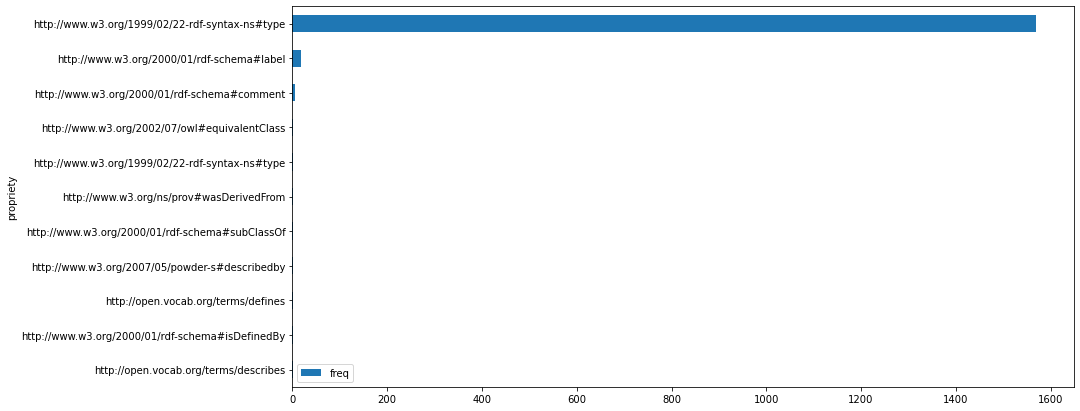

In [48]:
df5.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.show()

### Economist as an instance (https://dbpedia.org/resource/Economist):

In [52]:
query_economists_2= """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("economist" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbr:Economist
                      ?propriety ?object
          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbr:Economist
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [53]:
sparql.setQuery(query_economists_2)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [54]:
# Number of rows in the result
len(rc['results']['bindings'])

44

In [55]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/wikiPageWikiLink'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '3667'}, 'category': {'type': 'literal', 'value': 'economist'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/occupation'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '380'}, 'category': {'type': 'literal', 'value': 'economist'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/profession'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '356'}, 'category': {'type': 'literal', 'value': 'economist'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/property/profession'}, 'direction': {'type': 'literal',

In [56]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']] )
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [57]:
#display(result)

In [58]:
df6 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df6.set_index('propriety')
df6['freq']=df6['freq'].astype(float)

In [59]:
dfwtwl6=(df6[1:])

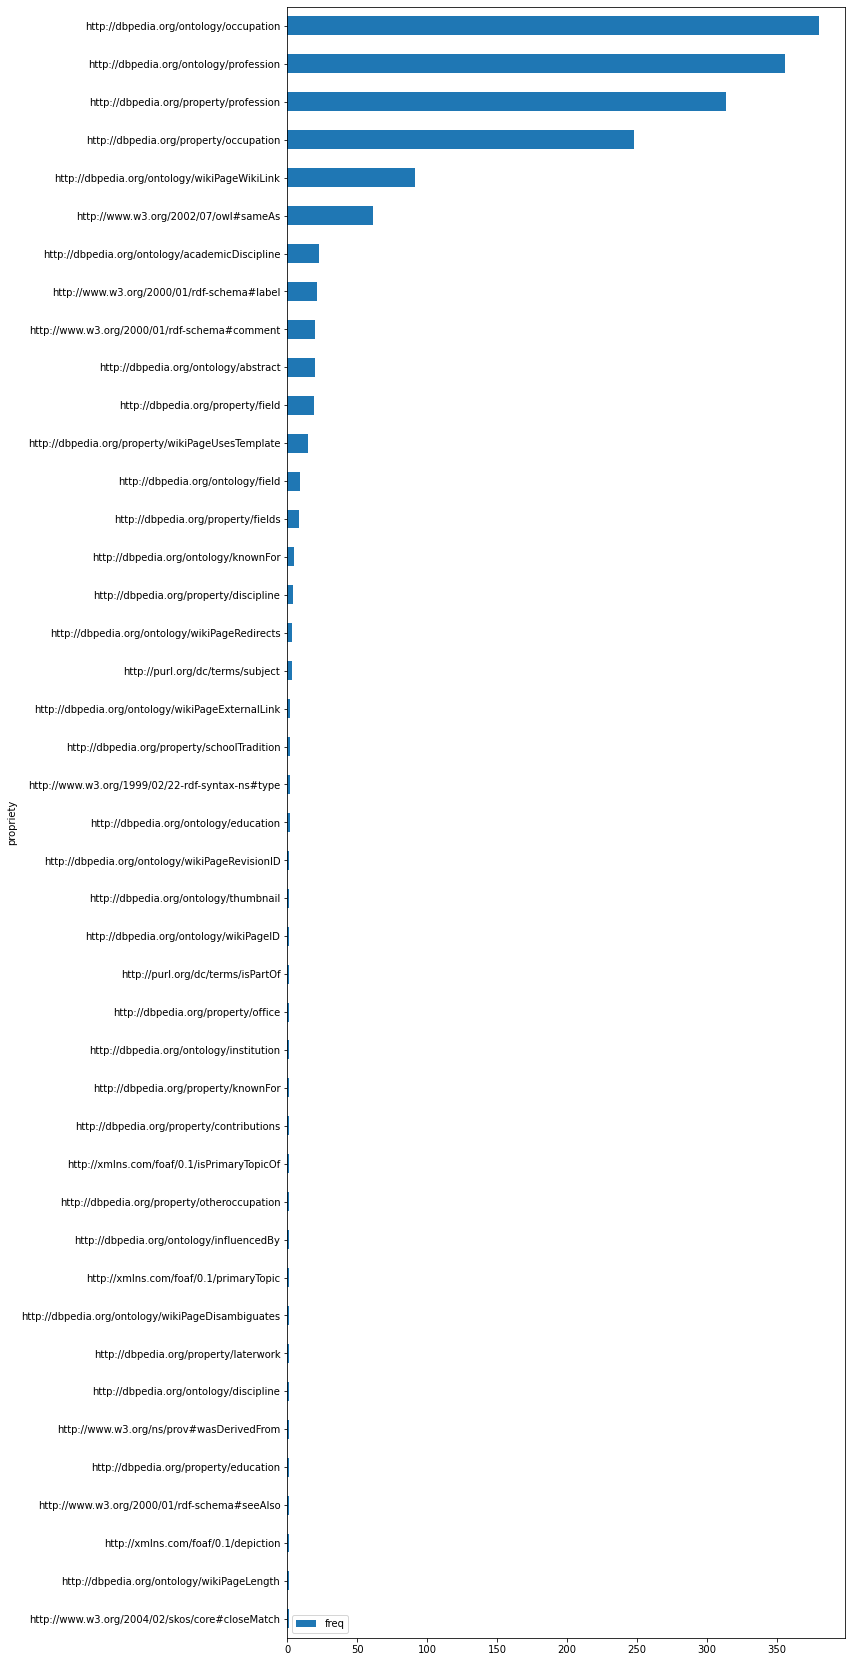

In [86]:
dfwtwl6.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gcf().set_size_inches(10, 30)
plt.gca().invert_yaxis()
plt.show()

### Economics as an instance (https://dbpedia.org/resource/Economics):

In [62]:
query_economists_3= """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("economist" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbr:Economics
                      ?propriety ?object
          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbr:Economics
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [63]:
sparql.setQuery(query_economists_3)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [64]:
# Number of rows in the result
len(rc['results']['bindings'])

76

In [65]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/wikiPageWikiLink'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '8925'}, 'category': {'type': 'literal', 'value': 'economist'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/wikiPageWikiLink'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '507'}, 'category': {'type': 'literal', 'value': 'economist'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/academicDiscipline'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '356'}, 'category': {'type': 'literal', 'value': 'economist'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/property/field'}, 'direction': {'type': 

In [68]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']] )
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [80]:
display(result)

[['http://dbpedia.org/ontology/wikiPageWikiLink', '8925', 'economist'],
 ['http://dbpedia.org/ontology/wikiPageWikiLink', '507', 'economist'],
 ['http://dbpedia.org/ontology/academicDiscipline', '356', 'economist'],
 ['http://dbpedia.org/property/field', '230', 'economist'],
 ['http://dbpedia.org/property/discipline', '175', 'economist'],
 ['http://dbpedia.org/ontology/field', '128', 'economist'],
 ['http://www.w3.org/2002/07/owl#sameAs', '115', 'economist'],
 ['http://dbpedia.org/property/fields', '86', 'economist'],
 ['http://dbpedia.org/property/subject', '67', 'economist'],
 ['http://dbpedia.org/ontology/nonFictionSubject', '61', 'economist'],
 ['http://dbpedia.org/ontology/education', '53', 'economist'],
 ['http://dbpedia.org/property/wikiPageUsesTemplate', '44', 'economist'],
 ['http://dbpedia.org/ontology/wikiPageRedirects', '43', 'economist'],
 ['http://dbpedia.org/property/genre', '30', 'economist'],
 ['http://dbpedia.org/ontology/mainInterest', '29', 'economist'],
 ['http://d

In [76]:
df7 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df7.set_index('propriety')
df7['freq']=df7['freq'].astype(float)

In [82]:
# Data frame without the first row (PageWikiLink)
# because we notice that the PageWikiLink headcount overwhelmes the other proprieties headcounts
dfwtwl7=(df7[2:])

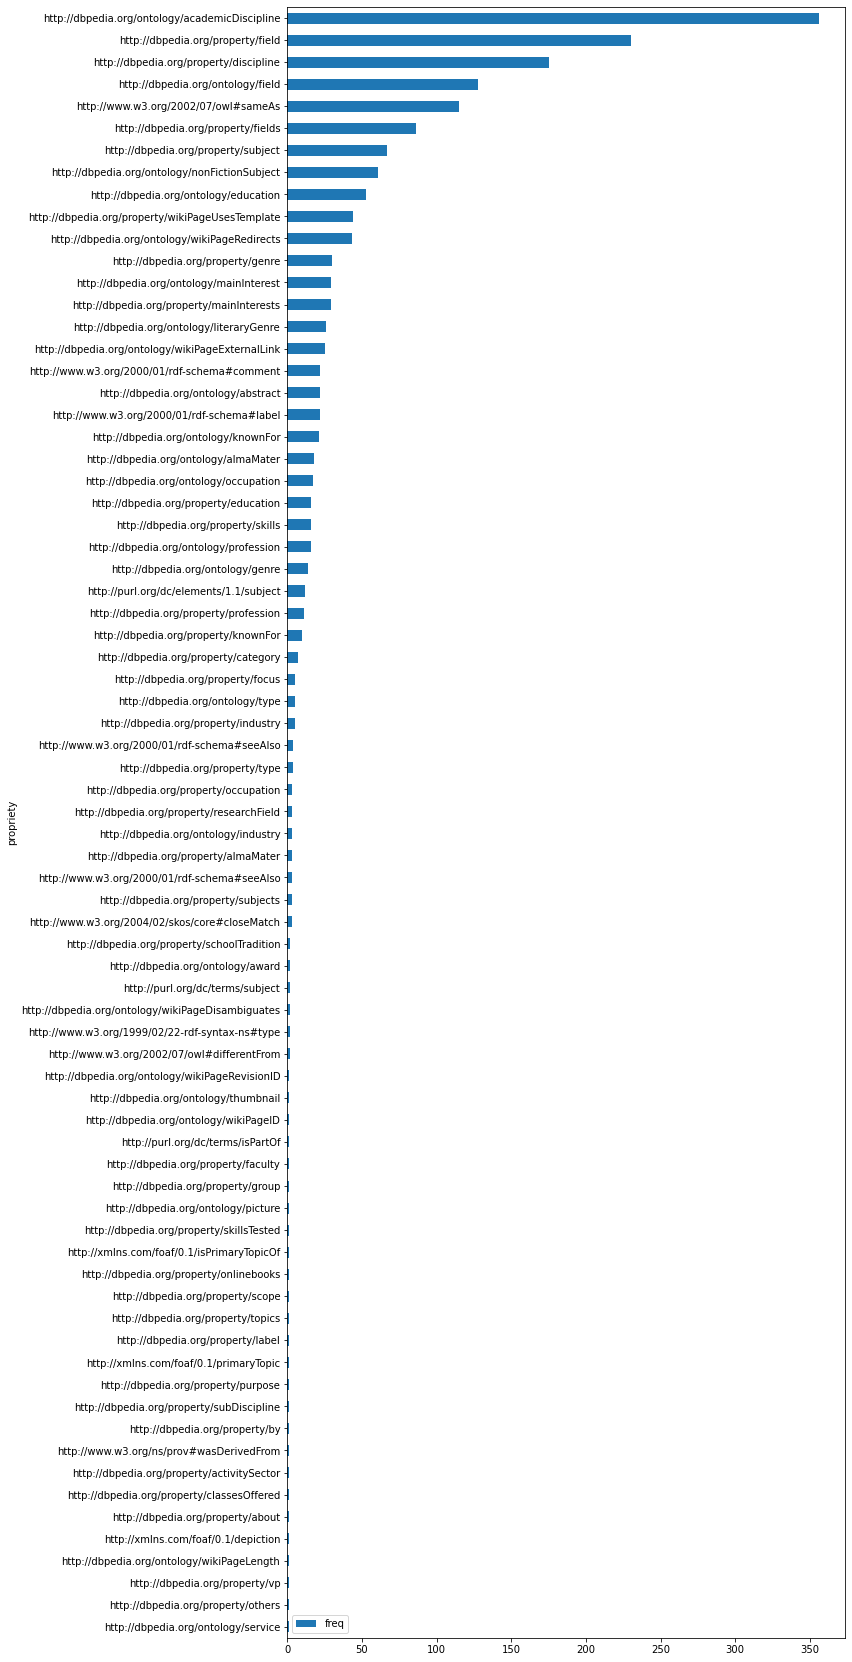

In [84]:
dfwtwl7.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gcf().set_size_inches(10, 30)
plt.gca().invert_yaxis()
plt.show()

### Hermann Heinrich Gossen as an instance (https://dbpedia.org/resource/Hermann_Heinrich_Gossen):

In [87]:
query_economists_4= """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("economist" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbr:Hermann_Heinrich_Gossen
                      ?propriety ?object
          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbr:Hermann_Heinrich_Gossen
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [88]:
sparql.setQuery(query_economists_4)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [89]:
# Number of rows in the result
len(rc['results']['bindings'])

36

In [90]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2002/07/owl#sameAs'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '30'}, 'category': {'type': 'literal', 'value': 'economist'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '28'}, 'category': {'type': 'literal', 'value': 'economist'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/wikiPageWikiLink'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '24'}, 'category': {'type': 'literal', 'value': 'economist'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/wikiPageWikiLink'}, 'direction': {'type'

In [91]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']] )
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [92]:
#display(result)

In [93]:
df8 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df8.set_index('propriety')
df8['freq']=df8['freq'].astype(float)

In [94]:
dfwtwl8=(df8[1:])

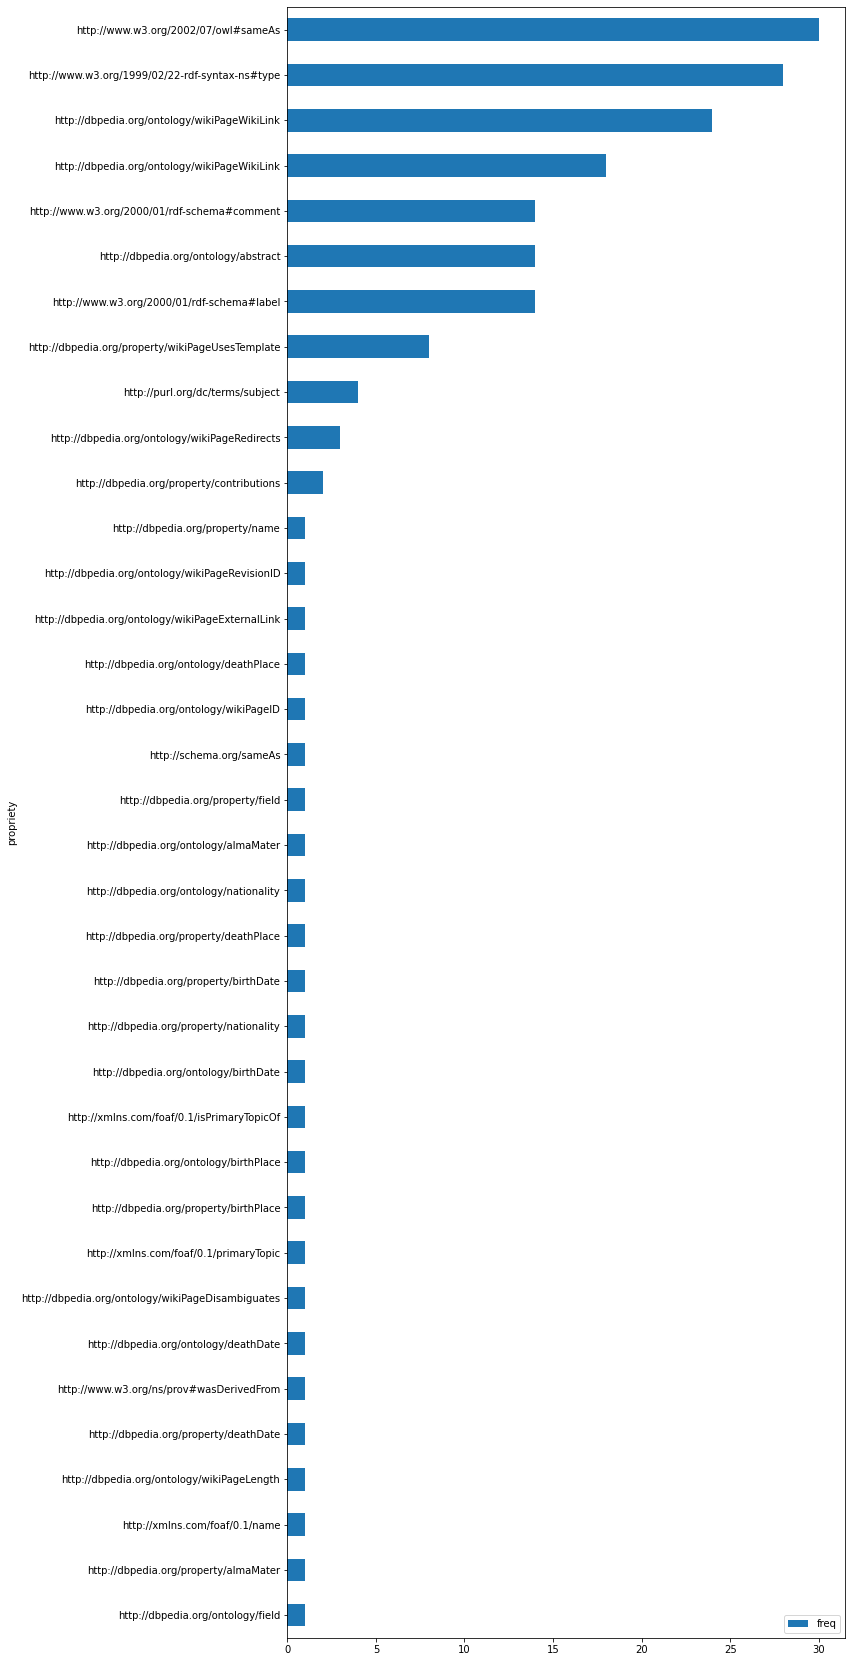

In [97]:
df8.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gcf().set_size_inches(10, 30)
plt.gca().invert_yaxis()
plt.show()

## Other queries
### PersonFunction as a class (https://dbpedia.org/ontology/PersonFunction):

In [98]:
query_other_1= """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("other" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbo:PersonFunction
                      ?propriety ?object
          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbo:PersonFunction
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [99]:
sparql.setQuery(query_other_1)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [100]:
# Number of rows in the result
len(rc['results']['bindings'])

12

In [101]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '514777'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#domain'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '14'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#range'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '12'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#label'}, 'direction': {'type': 'liter

In [102]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']] )
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [103]:
#display(result)

In [104]:
df9 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df9.set_index('propriety')
df9['freq']=df9['freq'].astype(float)

In [105]:
dfwtwl9=(df9[1:])

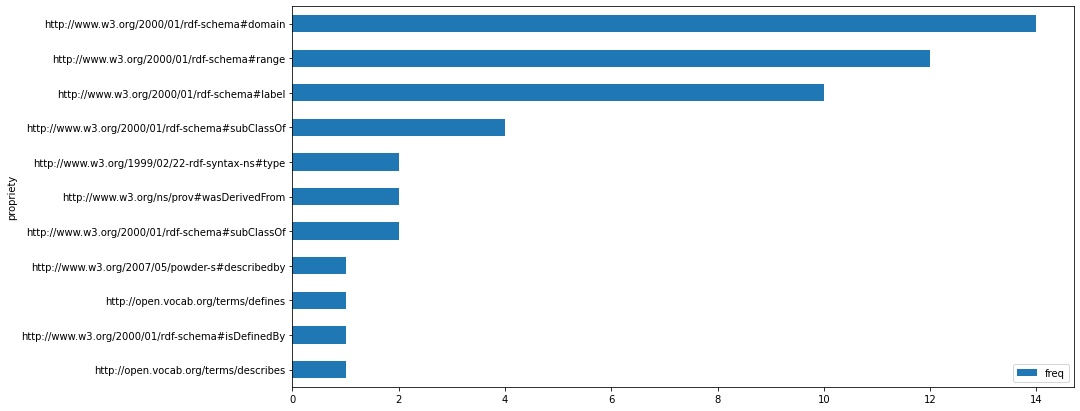

In [110]:
dfwtwl9.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.show()

### personFunction as a temporal entity (https://dbpedia.org/ontology/personFunction):

In [111]:
query_other_2= """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("other" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbo:personFunction
                      ?propriety ?object
          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbo:personFunction
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [112]:
sparql.setQuery(query_other_2)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [113]:
# Number of rows in the result
len(rc['results']['bindings'])

10

In [114]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#label'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '6'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '4'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#range'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '2'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#domain'}, 'direction': {'type': 'literal',

In [115]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']] )
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [116]:
#display(result)

In [117]:
df10 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df10.set_index('propriety')
df10['freq']=df10['freq'].astype(float)

In [118]:
dfwtwl10=(df10[1:])

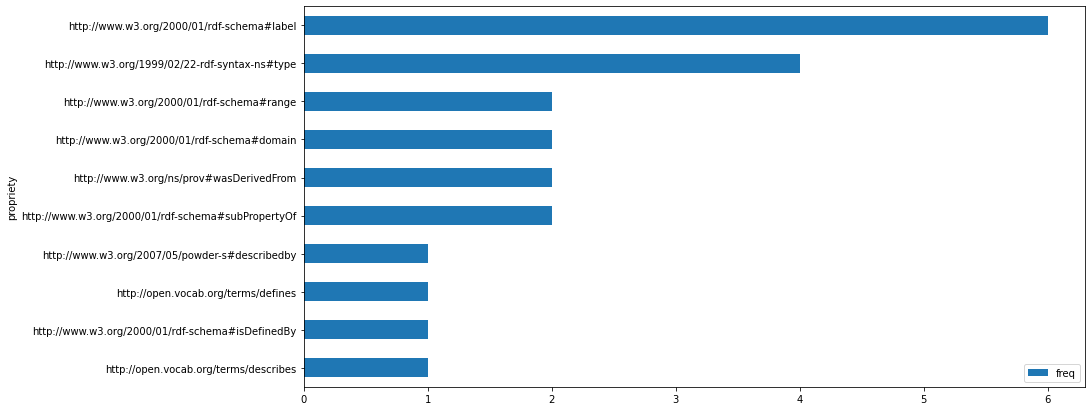

In [120]:
df10.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.show()

### Person as an instance (https://dbpedia.org/resource/Person):

In [121]:
query_other_3= """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("other" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbr:Person
                      ?propriety ?object
          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbr:Person
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [122]:
sparql.setQuery(query_other_3)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [123]:
# Number of rows in the result
len(rc['results']['bindings'])

20

In [124]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/wikiPageWikiLink'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '286'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/wikiPageWikiLink'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '88'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2002/07/owl#sameAs'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '52'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#comment'}, 'direction': {'type': 'literal', 'v

In [125]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']] )
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [126]:
#display(result)

In [127]:
df11 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df11.set_index('propriety')
df11['freq']=df11['freq'].astype(float)

In [128]:
dfwtwl11=(df11[1:])

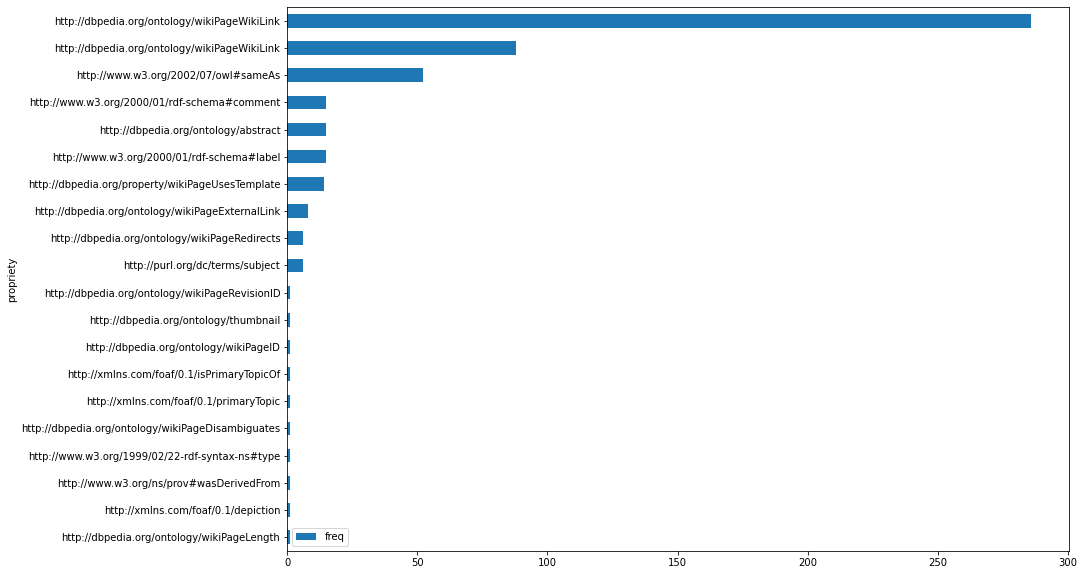

In [131]:
df11.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,10))
plt.gca().invert_yaxis()
plt.show()

### Person as a class (https://dbpedia.org/ontology/Person):

In [134]:
query_other_4= """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("other" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbo:Person
                      ?propriety ?object
          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbo:Person
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [135]:
sparql.setQuery(query_other_4)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [136]:
# Number of rows in the result
len(rc['results']['bindings'])

17

In [137]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1679324'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#domain'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '482'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#range'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '380'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#subClassOf'}, 'direction': {'type'

In [138]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']] )
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [144]:
display(result)

[['http://www.w3.org/1999/02/22-rdf-syntax-ns#type', '1679324', 'other'],
 ['http://www.w3.org/2000/01/rdf-schema#domain', '482', 'other'],
 ['http://www.w3.org/2000/01/rdf-schema#range', '380', 'other'],
 ['http://www.w3.org/2000/01/rdf-schema#subClassOf', '96', 'other'],
 ['http://www.w3.org/2002/07/owl#disjointWith', '40', 'other'],
 ['http://www.w3.org/2000/01/rdf-schema#label', '32', 'other'],
 ['http://www.w3.org/2002/07/owl#equivalentClass', '10', 'other'],
 ['http://www.w3.org/2002/07/owl#equivalentClass', '5', 'other'],
 ['http://www.w3.org/2002/07/owl#equivalentProperty', '2', 'other'],
 ['http://www.w3.org/1999/02/22-rdf-syntax-ns#type', '2', 'other'],
 ['http://www.w3.org/ns/prov#wasDerivedFrom', '2', 'other'],
 ['http://www.w3.org/2000/01/rdf-schema#subClassOf', '2', 'other'],
 ['http://www.w3.org/2000/01/rdf-schema#subPropertyOf', '1', 'other'],
 ['http://www.w3.org/2007/05/powder-s#describedby', '1', 'other'],
 ['http://open.vocab.org/terms/defines', '1', 'other'],
 ['ht

In [140]:
df12 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df12.set_index('propriety')
df12['freq']=df12['freq'].astype(float)

In [141]:
dfwtwl12=(df12[1:])

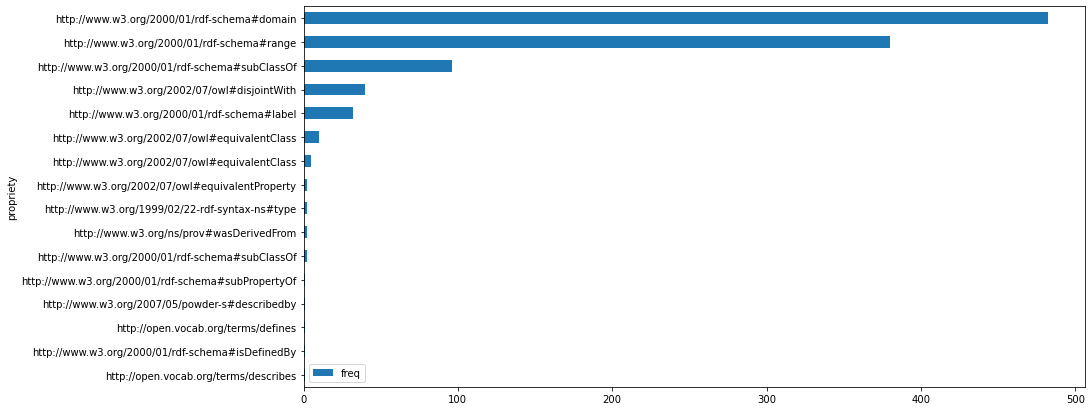

In [145]:
dfwtwl12.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.show()

### Professor as a class (https://dbpedia.org/ontology/Professor):

In [146]:
query_other_5= """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("other" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbo:Professor
                      ?propriety ?object
          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbo:Professor
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [147]:
sparql.setQuery(query_other_5)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [148]:
# Number of rows in the result
len(rc['results']['bindings'])

8

In [149]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#label'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '16'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '2'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/ns/prov#wasDerivedFrom'}, 'direction': {'type': 'literal', 'value': 'out'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '2'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://www.w3.org/2000/01/rdf-schema#subClassOf'}, 'direction': {'type': 'litera

In [150]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']] )
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [151]:
#result

In [152]:
df13 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df13.set_index('propriety')
df13['freq']=df13['freq'].astype(float)

In [153]:
dfwtwl13=(df13[1:])

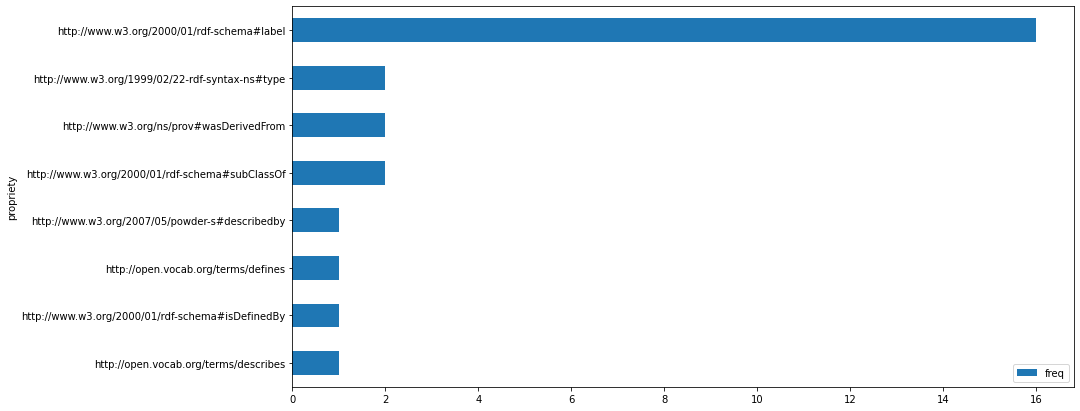

In [155]:
df13.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.show()

### Professor as an instance (https://dbpedia.org/resource/Professor):

In [156]:
query_other_6= """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT  ?propriety ?direction (COUNT(*) AS ?freq) ("other" AS ?category)
WHERE
  {   { SELECT  ?propriety ("out" AS ?direction)
        WHERE
          { dbr:Professor
                      ?propriety ?object .

          }
      }
    UNION
      { SELECT  ?propriety ?direction
        WHERE
          { ?subject  ?propriety  dbr:Professor
            BIND("in" AS ?direction)
          }
      }
  }
GROUP BY ?propriety ?direction
ORDER BY DESC(?freq)
"""

In [157]:
sparql.setQuery(query_other_6)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [158]:
# Number of rows in the result
len(rc['results']['bindings'])

90

In [159]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/wikiPageWikiLink'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '11545'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/occupation'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1202'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/property/occupation'}, 'direction': {'type': 'literal', 'value': 'in'}, 'freq': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1009'}, 'category': {'type': 'literal', 'value': 'other'}}
{'propriety': {'type': 'uri', 'value': 'http://dbpedia.org/ontology/profession'}, 'direction': {'type': 'literal', 'value':

In [160]:
# Extract values of lines
i = 0
result = []
for l in rc['results']['bindings']:
    if i < 10000 :
        try: 
            result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']] )
        except Exception as e :
            try: 
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])
            except Exception as e:
                print(e)
                result.append([l['propriety']['value'],l['freq']['value'],l['category']['value']])

        i += 1

In [161]:
#display(result)

In [162]:
df14 = pd.DataFrame(result, columns=['propriety','freq', 'category'])
df14.set_index('propriety')
df14['freq']=df14['freq'].astype(float)

In [163]:
dfwtwl14=(df14[1:])

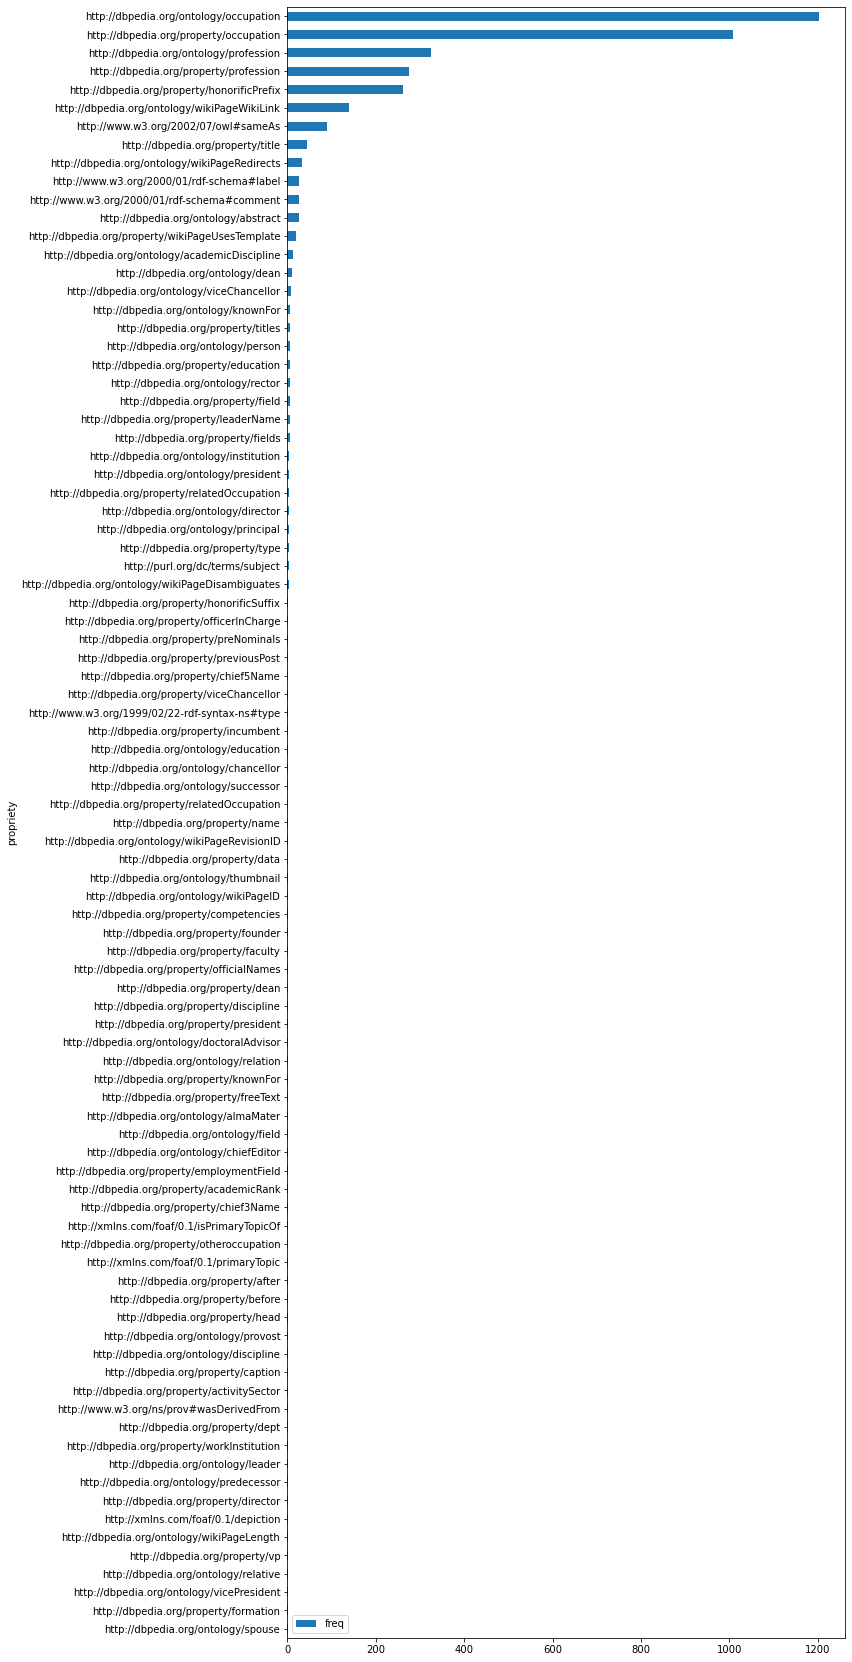

In [166]:
dfwtwl14.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gcf().set_size_inches(10, 30)
plt.gca().invert_yaxis()
plt.show()

# All of plot chart

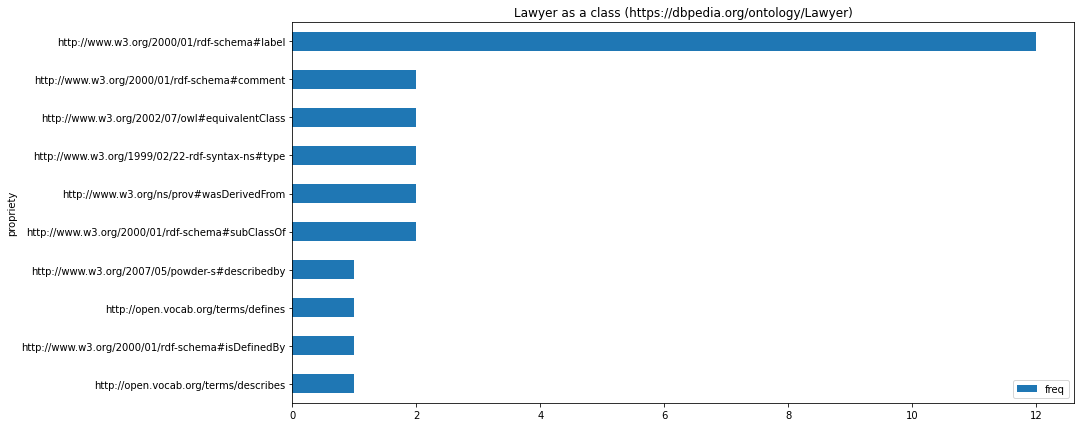

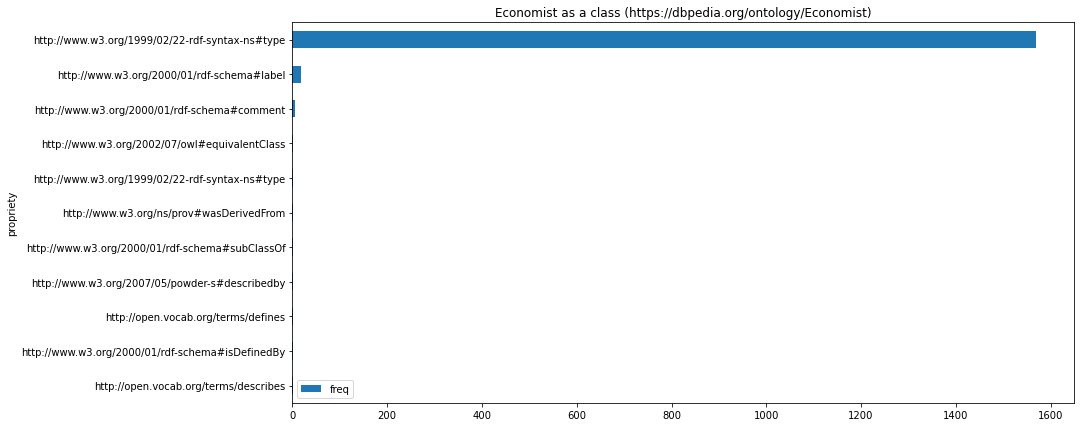

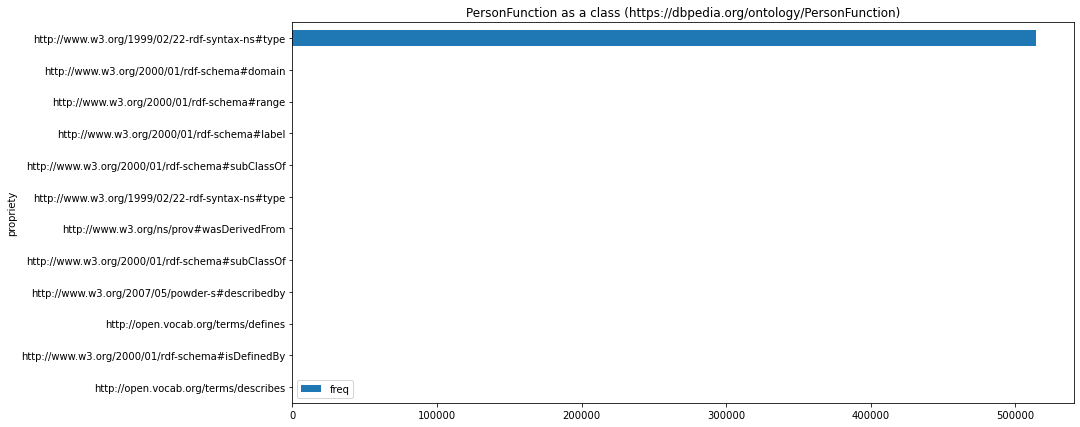

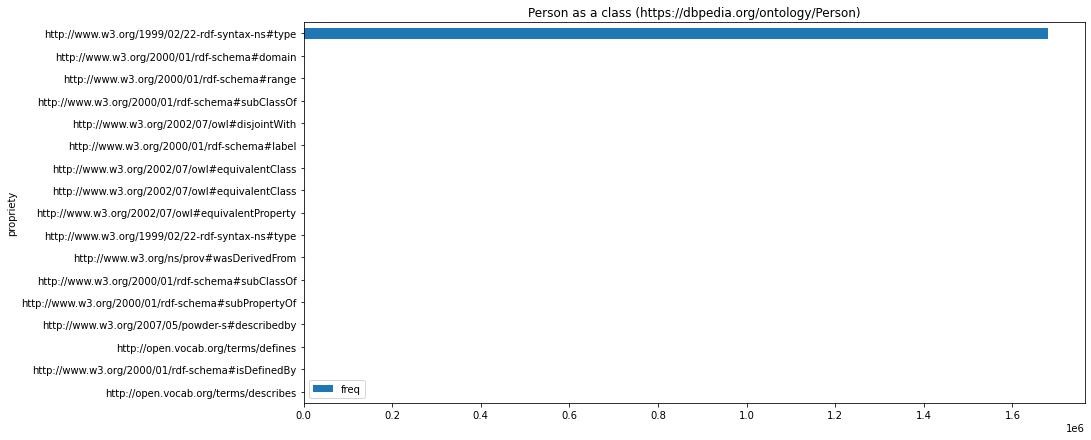

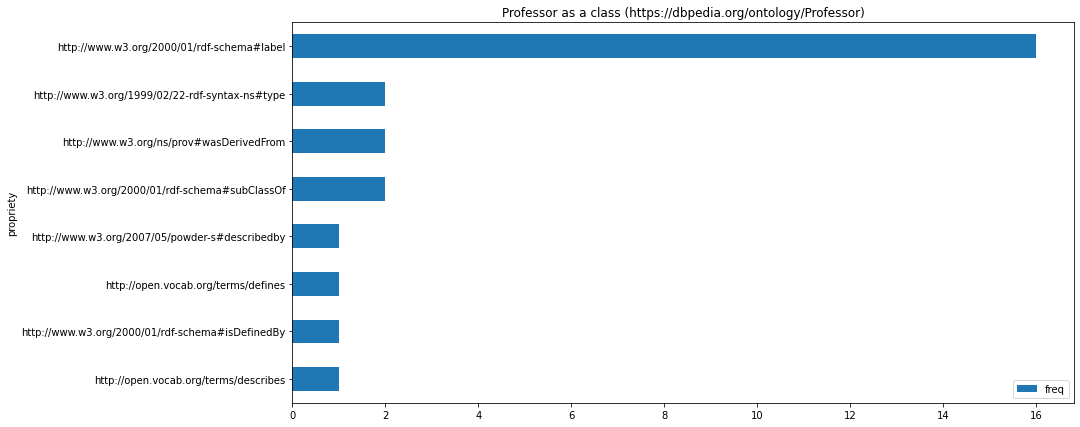

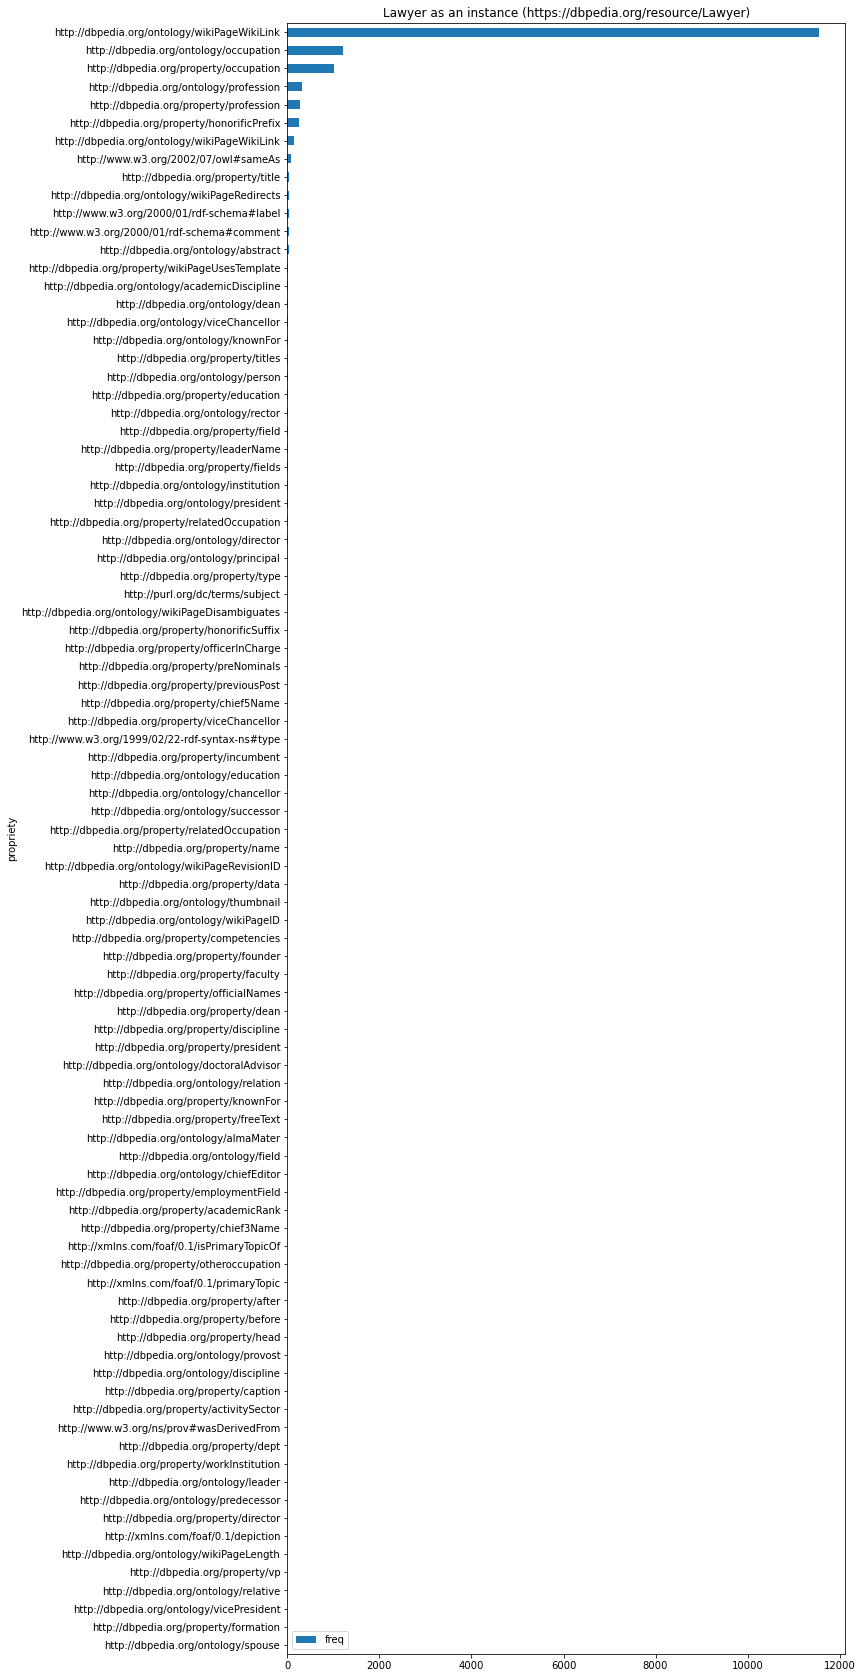

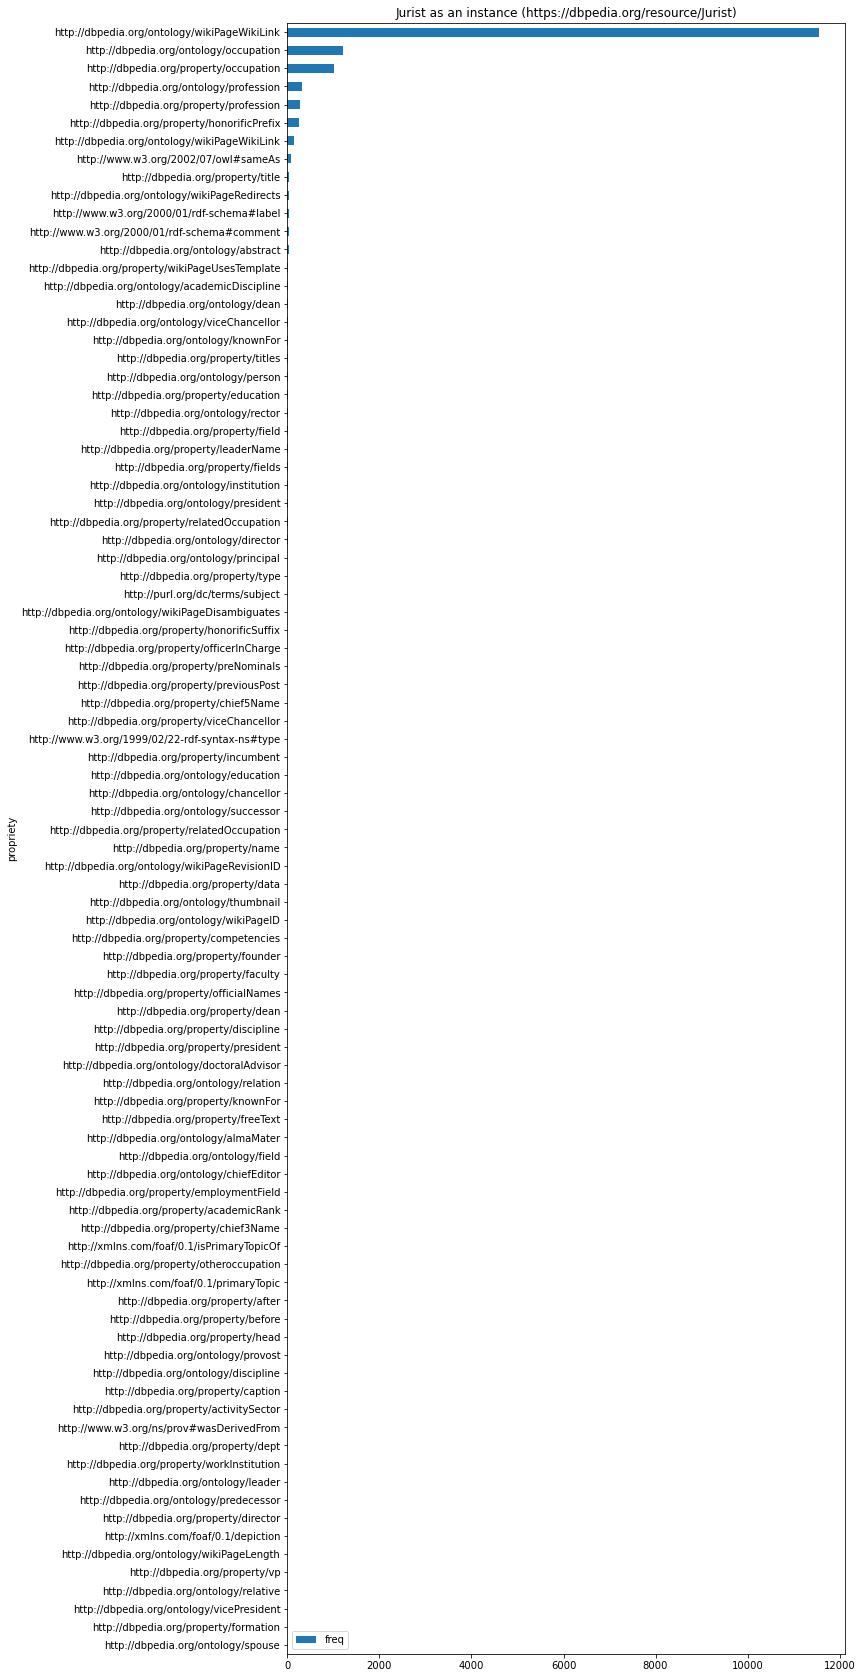

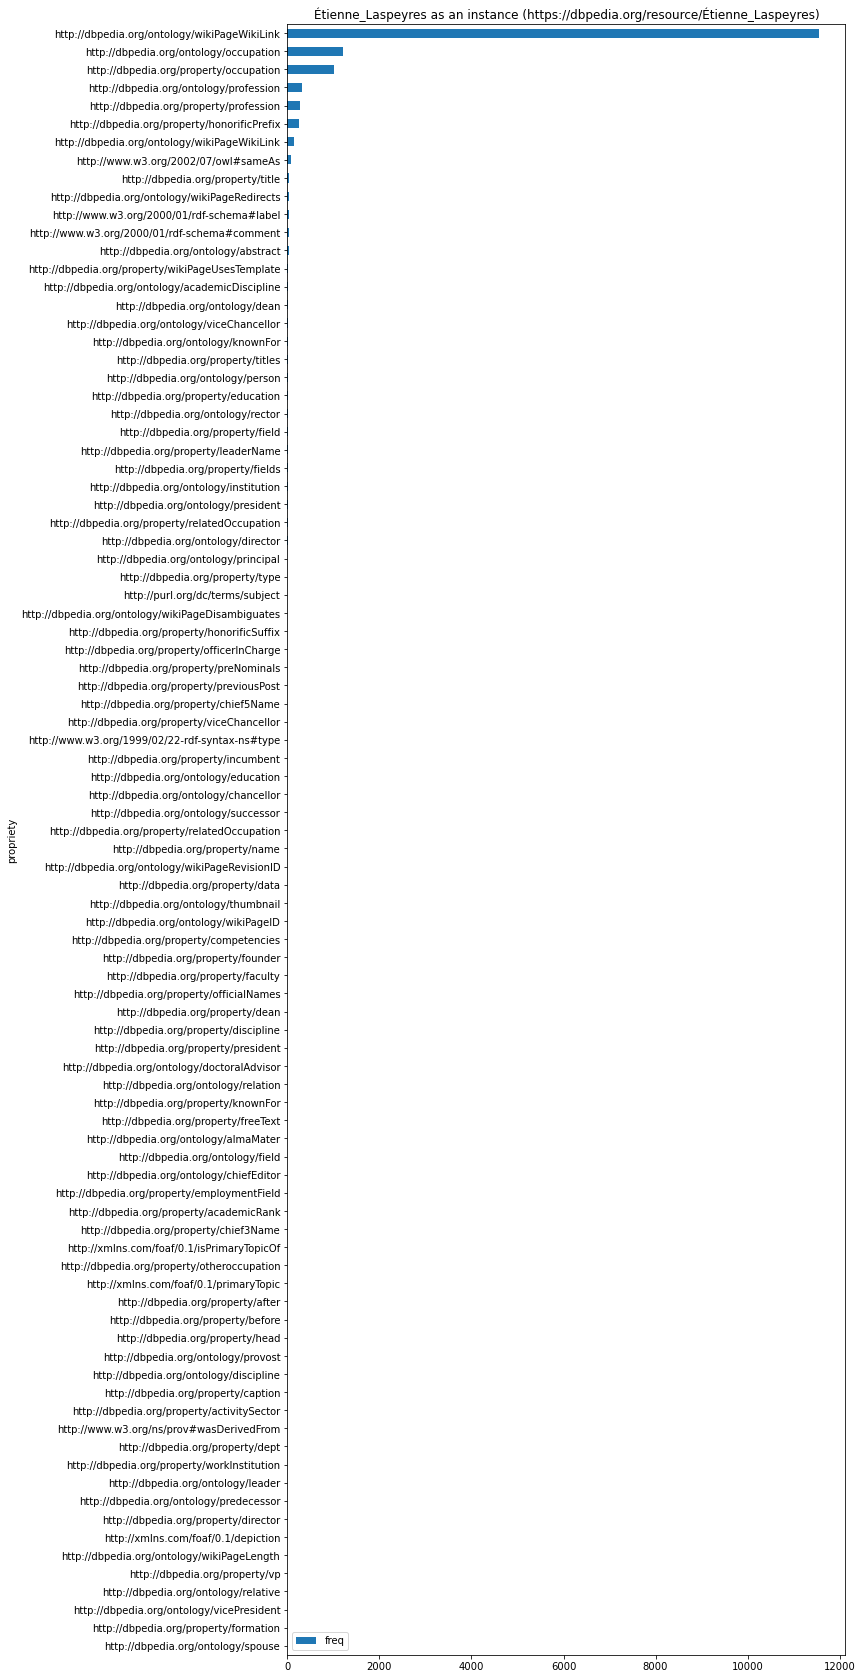

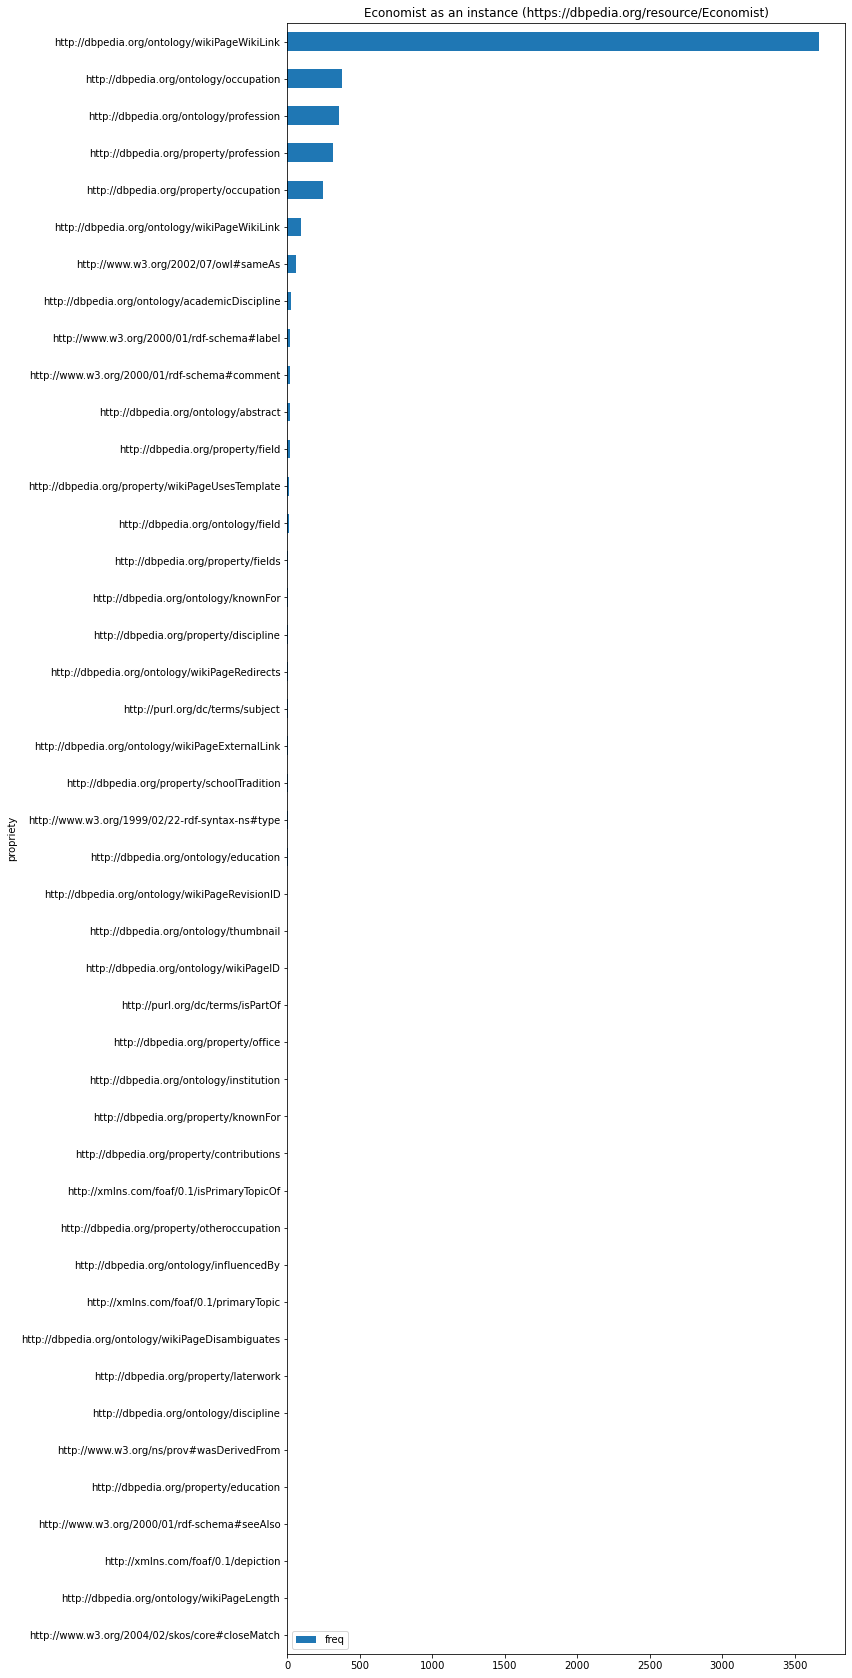

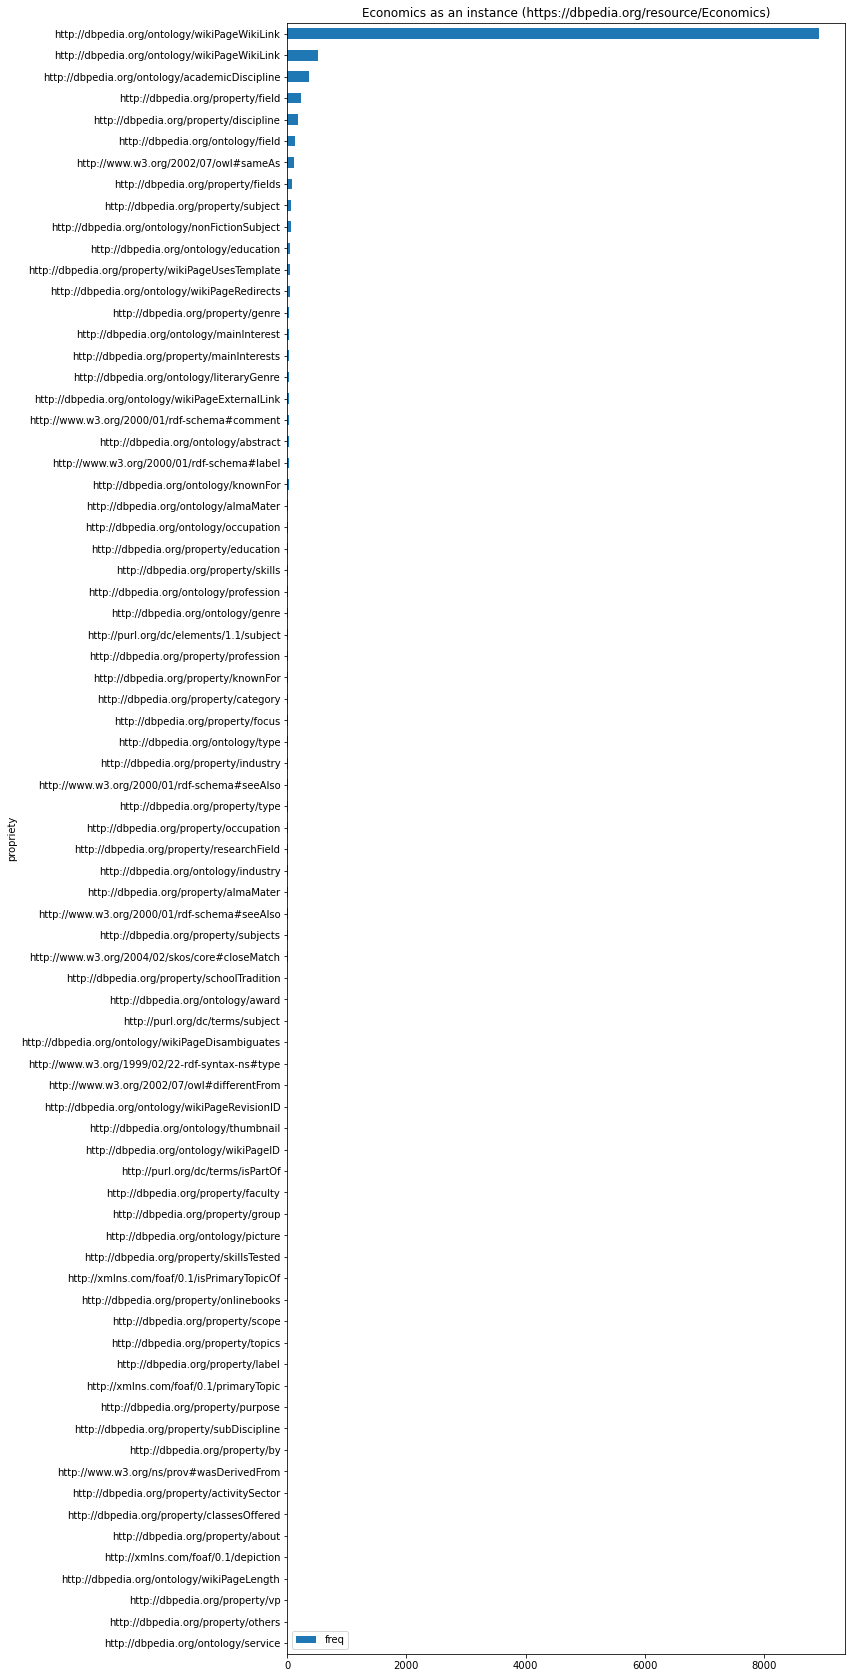

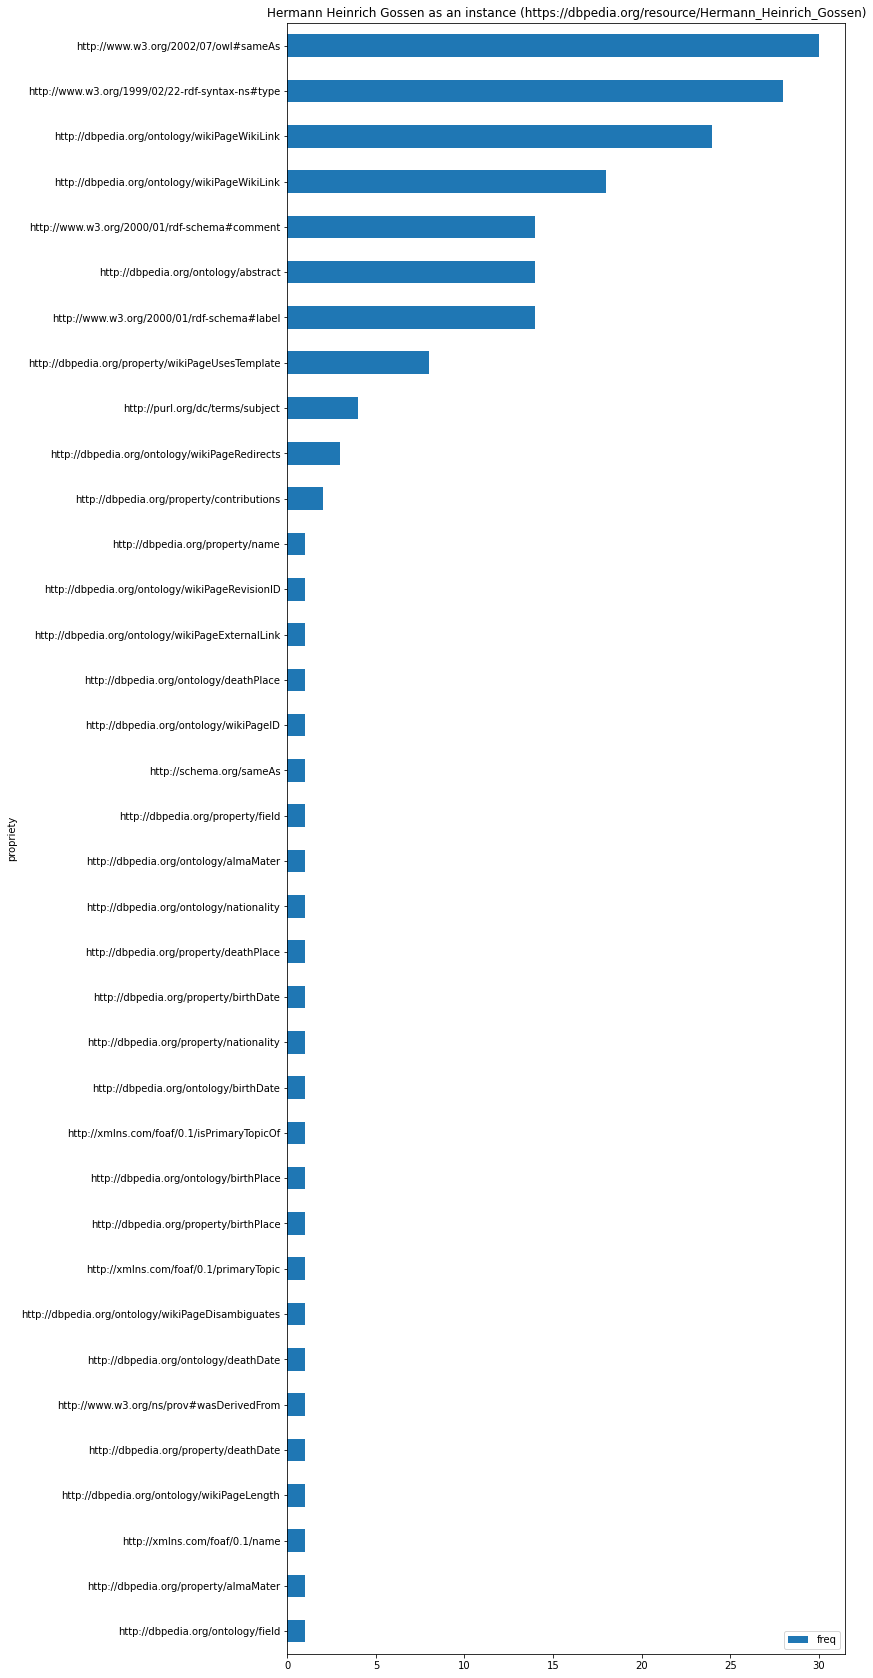

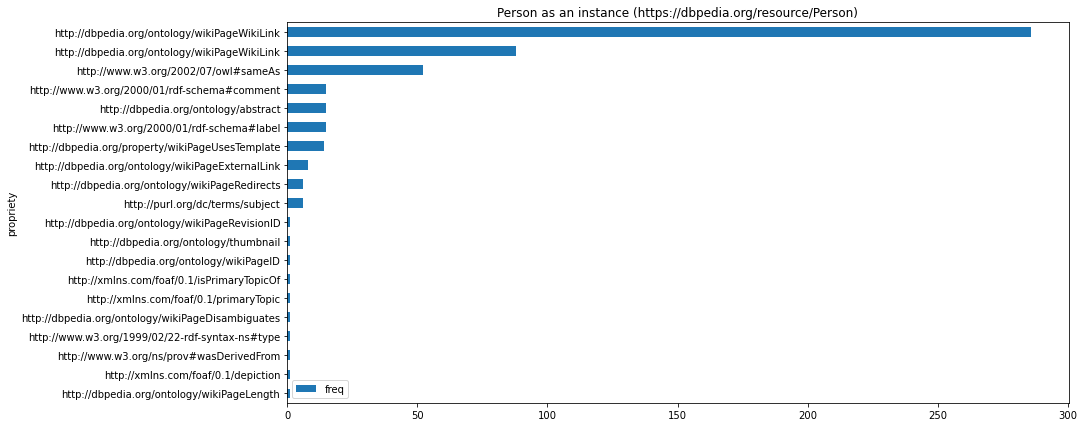

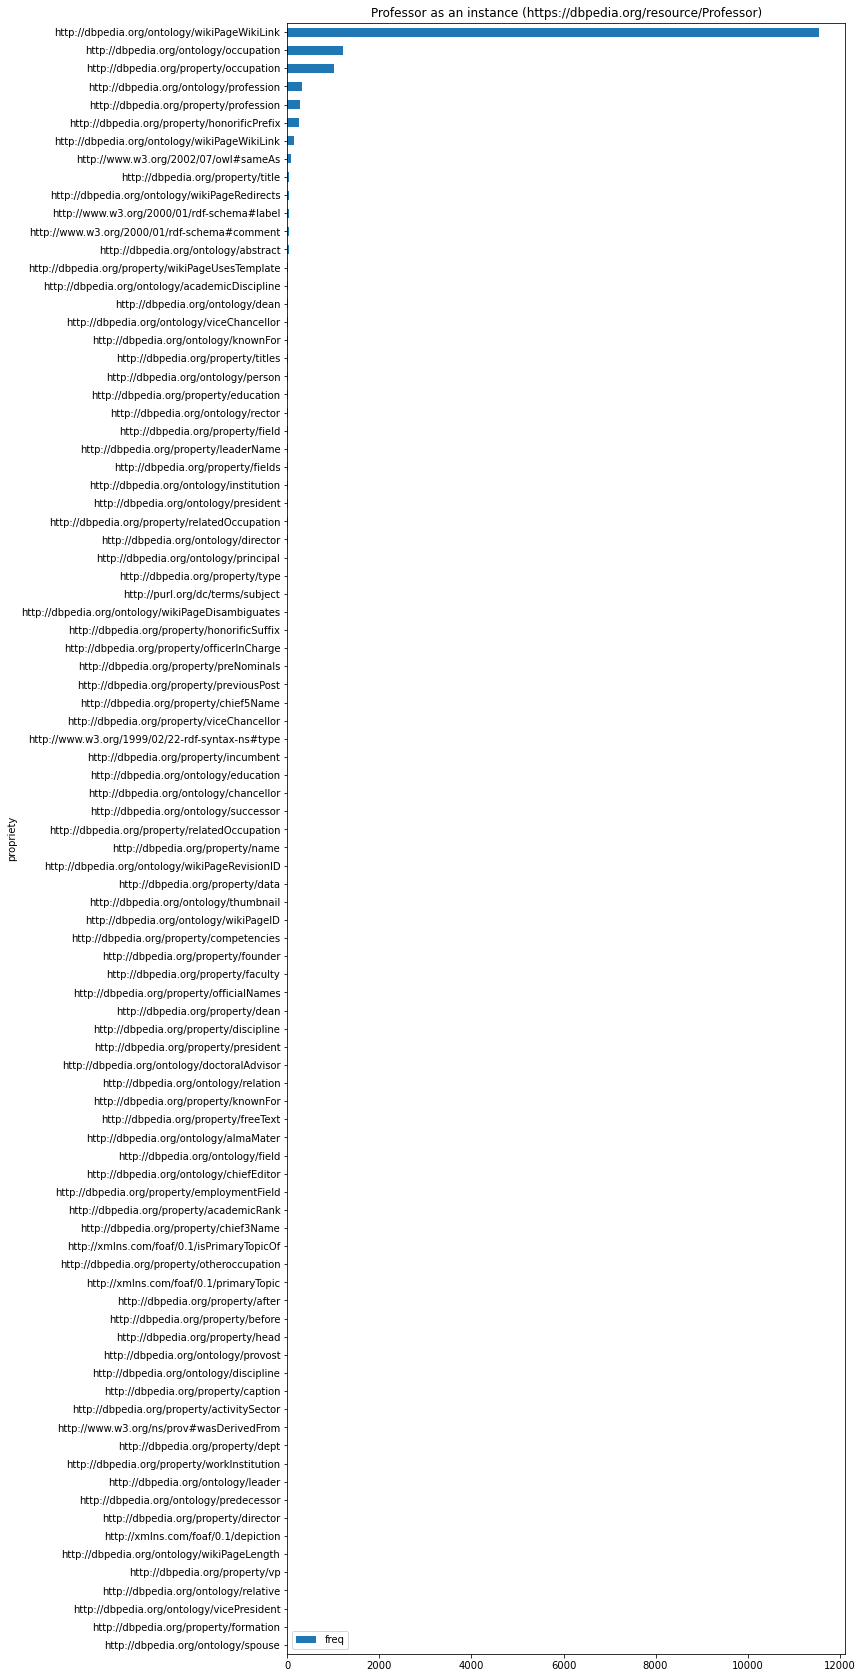

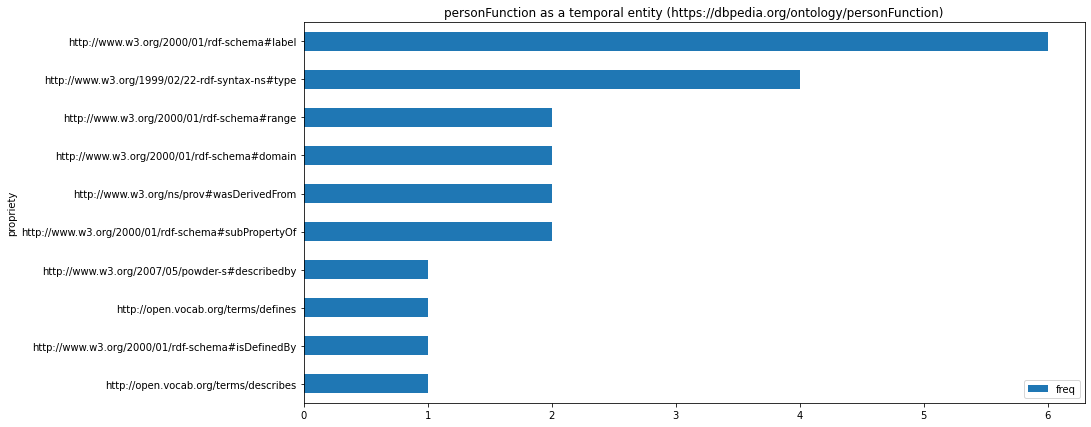

In [182]:
# plots of the classes
## Lawyer as a class
df2.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.title("Lawyer as a class (https://dbpedia.org/ontology/Lawyer)")
plt.show()

## Economist as a class
df5.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.title("Economist as a class (https://dbpedia.org/ontology/Economist)")
plt.show()

## PersonFunction as a class
df9.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.title("PersonFunction as a class (https://dbpedia.org/ontology/PersonFunction)")
plt.show()

## Person as a class
df12.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.title("Person as a class (https://dbpedia.org/ontology/Person)")
plt.show()

## Professor as a class
df13.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.title("Professor as a class (https://dbpedia.org/ontology/Professor)")
plt.show()


# plots of the instances
## Lawyer as an instance
df1.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7), )
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(10, 30)
plt.title("Lawyer as an instance (https://dbpedia.org/resource/Lawyer)")
plt.show()

## Jurist as an instance 
df3.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(10, 30)
plt.title("Jurist as an instance (https://dbpedia.org/resource/Jurist)")
plt.show()

## Étienne_Laspeyres as an instance
df4.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(10, 30)
plt.title("Étienne_Laspeyres as an instance (https://dbpedia.org/resource/Étienne_Laspeyres)")
plt.show()

## Economist as an instance
df6.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(10, 30)
plt.title("Economist as an instance (https://dbpedia.org/resource/Economist)")
plt.show()

## Economics as an instance
df7.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(10, 30)
plt.title("Economics as an instance (https://dbpedia.org/resource/Economics)")
plt.show()

## Hermann Heinrich Gossen as an instance 
df8.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(10, 30)
plt.title("Hermann Heinrich Gossen as an instance (https://dbpedia.org/resource/Hermann_Heinrich_Gossen)")
plt.show()

## Person as an instance
df11.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.title("Person as an instance (https://dbpedia.org/resource/Person)")
plt.show()

## Professor as an instance
df14.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(10, 30)
plt.title("Professor as an instance (https://dbpedia.org/resource/Professor)")
plt.show()

# Temporal entity
## personFunction as a temporal entity
df10.plot(x="propriety", kind='barh', rot='horizontal', figsize=(14,7))
plt.gca().invert_yaxis()
plt.title("personFunction as a temporal entity (https://dbpedia.org/ontology/personFunction)")
plt.show()



